**Lab Assignment 1: TF-IDF Vector Space Model with Cosine Similarity**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    "The sky is blue.",
    "The sun is bright.",
    "The sun in the sky is bright.",
    "We can see the shining sun, the bright sun."
]
query = "blue sky"

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents + [query])

cos_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])
for idx, score in enumerate(cos_similarities[0]):
    print(f"Document {idx}: {score:.2f}")


Document 0: 0.77
Document 1: 0.00
Document 2: 0.21
Document 3: 0.00


**Lab Assignment 2: Named Entity Recognition with spaCy**

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
text = "Barack Obama was born in Hawaii. He was the president of the USA."

doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)

displacy.serve(doc, style="ent")


Barack Obama PERSON
Hawaii GPE
USA GPE


/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


**Lab Assignment 3: Rule-Based English to Hindi Translation**

In [ ]:
import re

dictionary = {
    "hello": "नमस्ते",
    "how": "कैसे",
    "are": "हैं",
    "you": "आप"
}

def translate(sentence):
    words = re.findall(r'\w+', sentence.lower())
    translated = [dictionary.get(word, word) for word in words]
    return " ".join(translated)

print(translate("Hello, how are you?"))


नमस्ते कैसे हैं आप


**Unit VI: NLP Tools and Techniques
Lab Assignment 5: Topic Modeling using Gensim LDA**

In [ ]:
!pip install numpy==1.23.5

In [ ]:
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [ ]:
from gensim import corpora, models
from pprint import pprint

docs = [
    "Cats are small animals.",
    "Dogs are friendly animals.",
    "Cats and dogs can live together.",
    "Dogs need daily walks."
]

texts = [[word for word in doc.lower().split()] for doc in docs]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)
topics = lda.print_topics(num_words=5)
pprint(topics)


[(0,
  '0.146*"dogs" + 0.140*"daily" + 0.140*"walks." + 0.140*"need" + '
  '0.049*"cats"'),
 (1,
  '0.122*"animals." + 0.122*"are" + 0.122*"cats" + 0.120*"dogs" + '
  '0.073*"small"')]


**Lab Assignment 6: Word Sense Disambiguation with Lesk**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # for additional wordnet definitions
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize

sentence = "He deposited money in the bank"
word = "bank"
sense = lesk(word_tokenize(sentence), word)
print("Best sense:", sense)
print("Definition:", sense.definition())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Best sense: Synset('savings_bank.n.02')
Definition: a container (usually with a slot in the top) for keeping money at home


**Unit I: Introduction to NLP
Lab Assignment 1: Text Preprocessing & Regex**

In [ ]:
import re, spacy
from nltk.stem import PorterStemmer

import en_core_web_sm
nlp = en_core_web_sm.load()

text = """Contact us at info@example.com or +1-202-555-0156 #Support"""

# Use SpaCy for tokens instead
doc = nlp(text)
tokens = [token.text for token in doc]

# Stemming using NLTK
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in tokens]

# Lemmatization from SpaCy
lemmas = [token.lemma_ for token in doc]

# Regex
emails = re.findall(r'\S+@\S+', text)
phones = re.findall(r'\+\d{1,2}-\d{3}-\d{3}-\d{4}', text)
hashtags = re.findall(r'#\w+', text)

print("Tokens:", tokens)
print("Stems:", stems)
print("Lemmas:", lemmas)
print("Emails:", emails)
print("Phones:", phones)
print("Hashtags:", hashtags)


Tokens: ['Contact', 'us', 'at', 'info@example.com', 'or', '+1', '-', '202', '-', '555', '-', '0156', '#', 'Support']
Stems: ['contact', 'us', 'at', 'info@example.com', 'or', '+1', '-', '202', '-', '555', '-', '0156', '#', 'support']
Lemmas: ['contact', 'we', 'at', 'info@example.com', 'or', '+1', '-', '202', '-', '555', '-', '0156', '#', 'support']
Emails: ['info@example.com']
Phones: ['+1-202-555-0156']
Hashtags: ['#Support']


**Lab Assignment 2: POS Tagging**

In [ ]:
import spacy
from collections import Counter

# Load spaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()

# Sample text
text = "Apple is looking at buying U.K. startup for $1 billion"

# Process text with spaCy
doc = nlp(text)

# Get POS tags and count them
pos_tags = [token.pos_ for token in doc]
counts = Counter(pos_tags)

print(counts)


Counter({'VERB': 3, 'PROPN': 2, 'ADP': 2, 'NUM': 2, 'AUX': 1, 'SYM': 1})


 **Unit II: Language Syntax and Semantics
Lab Assignment 3: Morphological Analysis using FST**

In [ ]:
words = ["running", "happier", "unhappy"]
rules = {
    "running": ("run", "ing"),
    "happier": ("happy", "er"),
    "unhappy": ("un", "happy")
}

for word in words:
    print(f"{word} → {' + '.join(rules.get(word, [word]))}")


running → run + ing
happier → happy + er
unhappy → un + happy


Lab Assignment 4: Dependency Parsing with spaCy

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
text = "Apple is looking at buying a startup in the UK."

doc = nlp(text)
for token in doc:
    print(token.text, token.dep_, token.head.text)

displacy.serve(doc, style="dep")


Apple nsubj looking
is aux looking
looking ROOT looking
at prep looking
buying pcomp at
a det startup
startup dobj buying
in prep buying
the det UK
UK pobj in
. punct looking


/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Lab Assignment 5: N-gram Language Model

In [ ]:
import spacy
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace
from nltk.util import ngrams

# Load spaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()

# Text input
text = "The dog barked at the mailman"

# Tokenization using spaCy
doc = nlp(text.lower())
tokens = [token.text for token in doc if not token.is_space]

# Create bigrams with padding
n = 2
train_data, padded_vocab = padded_everygram_pipeline(n, [tokens])

# Train Laplace-smoothed bigram model
model = Laplace(n)
model.fit(train_data, padded_vocab)

# Score predictions
print(model.score("dog", ["the"]))      # P(dog | the)
print(model.score("barked", ["dog"]))   # P(barked | dog)



0.2
0.2222222222222222


Lab Assignment 6: Word2Vec with Gensim

Similar to dog: [('barks', 0.10232102125883102), ('bird', 0.018277142196893692), ('sings', 0.012442175298929214), ('meows', -0.02784133516252041), ('cat', -0.2091004103422165)]


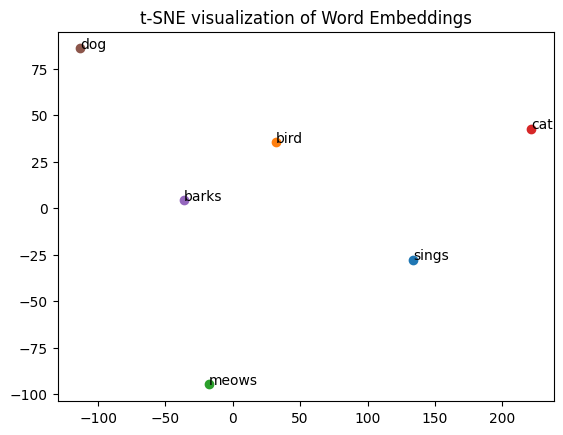

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np  # ← Add this import

# Train Word2Vec model
sentences = [["dog", "barks"], ["cat", "meows"], ["bird", "sings"]]
model = Word2Vec(sentences, min_count=1, vector_size=50)

word_vectors = model.wv
print("Similar to dog:", word_vectors.most_similar("dog"))

# Prepare labels and vectors
labels, tokens = zip(*[(word, word_vectors[word]) for word in word_vectors.index_to_key])
tokens = np.array(tokens)  # ← Convert to proper 2D array

# Apply t-SNE
tsne_model = TSNE(perplexity=2, random_state=42)
new_values = tsne_model.fit_transform(tokens)

# Plot
for i, label in enumerate(labels):
    x, y = new_values[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y))
plt.title("t-SNE visualization of Word Embeddings")
plt.show()
